## Review

Given a string s, create a function called `reverseOnlyLetters(s)` that reverses the string according to the following rules:

* All the characters that are not English letters remain in the same position.
* All the English letters (lowercase or uppercase) should be reversed.
* Return s after reversing it.

Example 1
```
Input: s = "ab-cd"
Output: "dc-ba"
```

Example 2
```
Input: s = "a-bC-dEf-ghIj"
Output: "j-Ih-gfE-dCba"
```

Example 3
```
Input: s = "Test1ng-Leet=code-Q!"
Output: "Qedo1ct-eeLg=ntse-T!"
```

Once you have a solution consider how you can make it more efficient in time complexity.

## Basic Plots Via Matplotlib

Using our computed statistics, we attribute meaning to our numbers to reveal patterns & trends.

Just text however is ineffective. We want instant impact.

We complement our quantitative measures using visualizations as we saw last week.

Since plotting is so common with data analysis, Python comes with pre-built functions that take datasets and convert them into visualizations.

We will use `matplotlib.pyplot` : https://matplotlib.org/stable/index.html 

This package is mostly useful for generating non-interactive visualizations to be used in exploratory data analysis, presentations & jupyter notebooks.


## Installation

Firstly, let’s install `matplotlib` through pip:
```
pip3 install matplotlib (MacOS)
pip install matplotlib  (Windows)
```

With the recent news of UFO sightings (Unidentified Flying Objects), we’re a team of analysts in charge of classifying these unexplained visitors 🛸🛸🛸

We will not worry about how this data was cleaned or loaded.

The main focus: we pass in ordered “lists” aka “array-like”  data structures.


In [ ]:
## setup code. Not relevant to graphing, but you're free to explore ##

import pandas as pd
import numpy as np

df = pd.read_csv("../11_21/data/complete.csv", warn_bad_lines=False, error_bad_lines=False)

# get time duration
dropped = pd.to_numeric(df["duration (seconds)"], errors='coerce').dropna()
dur_index = dropped.index.tolist()
duration = dropped.tolist()

dur_state = df.loc[dropped.index]["state"]
dur_state = dur_state.replace(np.nan, '').tolist()

df['year'] = pd.to_datetime(df['datetime'], errors='coerce').dt.year
year = df['year'].dropna().value_counts().sort_index()
years = year.index.tolist()

# get date and count for NY, CA, TX, & WA
# NY
df_ny = df[df["state"] == "ny"]
df_ny = df_ny["year"].value_counts()
ny_years = df_ny.index.tolist()
ny_val = df_ny.tolist()

# CA
df_ca = df[df["state"] == "ca"]
df_ca = df_ca["year"].value_counts()
ca_years = df_ca.index.tolist()
ca_val = df_ca.tolist()

# TX
df_tx = df[df["state"] == "tx"]
df_tx = df_tx["year"].value_counts()
tx_years = df_tx.index.tolist()
tx_val = df_tx.tolist()

# WA
df_wa = df[df["state"] == "wa"]
df_wa = df_wa["year"].value_counts()
wa_years = df_wa.index.tolist()
wa_val = df_wa.tolist()



## Box & Whisker Plot

Create a box & whisker plot of the effective minimum wage for each state in `box_data`. Use the list `years` as your labels and ignore outliers. Label your x-axis as "years" and your y-axis as "wages USD(2020)."

Use these bar charts to discuss visual insights on effective minimum wage in 2020 dollars in questions 7 through 9.

In [3]:
# get list of lists for each type of UFO in California
data = df.dropna(subset=['duration (seconds)'])

categories = ["cylinder", "light", "circle", "sphere", "disk", "fireball", "formation"]
ny_box_data = []

for cat in categories:
    handle = pd.to_numeric(data[(data["state"] == "ny") & (data["shape"] == cat)]["duration (seconds)"]).tolist()
    ny_box_data.append(handle)

ca_box_data = []

for cat in categories:
    handle = pd.to_numeric(data[(data["state"] == "ny") & (data["shape"] == cat)]["duration (seconds)"]).tolist()
    ca_box_data.append(handle)


In [5]:
print("DURATION OF TIME SPENT LOOKING AT UFO")
print(duration[:5])
print(dur_index[:5])
print(dur_state[:5])

DURATION OF TIME SPENT LOOKING AT UFO
[2700.0, 7200.0, 20.0, 20.0, 900.0]
[0, 1, 2, 3, 4]
['tx', 'tx', '', 'tx', 'hi']


In [4]:
print("YEARS AND VALUE")
print(years[:5])
print(years_val[:5])

YEARS AND VALUE
[1906.0, 1910.0, 1914.0, 1916.0, 1920.0]
[1, 2, 1, 1, 1]


In [7]:
print("LOCATIONS AND VALUE")
#print(loc_states[:5])
print(loc_val[:10])

LOCATIONS AND VALUE
[10450, 4653, 4598, 4050, 3511, 2940, 2874, 2783, 2642, 2254]


## Box & Whisker Plots

Box & whisker plots describe expected values for various categories 

Describe differences in data distributions

Box & whisker diagrams display the following measures visually:

* Maximum & Minimum

* Median (Middle of sorted data) (AKA Quarter 2)

* Interquartile-Range (Quarter 1 & Quarter 2)

Text(0.5, 1.0, 'Durations of UFO Type in CA')

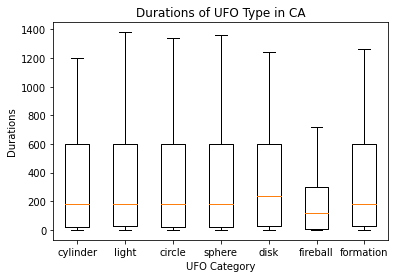

In [182]:
fig, ax = plt.subplots()
ax.boxplot(ca_box_data, showfliers=False, labels=categories)
ax.set_xlabel("UFO Category")
ax.set_ylabel("Durations")
ax.set_title("Durations of UFO Type in CA")

{'whiskers': [<matplotlib.lines.Line2D at 0x1eba33a09d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1eba33a0f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eba33a0700>,
 'medians': [<matplotlib.lines.Line2D at 0x1eba33a1510>,
 'fliers': [],
 'means': []}

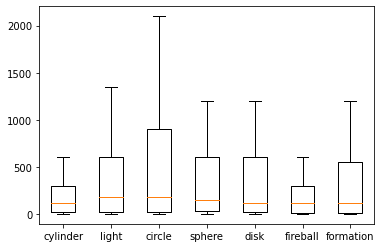

In [204]:
fig, ax = plt.subplots()
ax.boxplot(ny_box_data, showfliers=False, labels=categories)


## Quartiles

Calculating Lower Quartile & Upper Quartile

Lower Quartile: the median of the left-half of the list (not-including the median)

Upper Quartile: the median of the right-half of the list (not-including the median)

First we calculate the median

```
[18, 27, 34, 52, 54, 59, 61, 68, 78, 82, 85, 87, 91, 93, 100]
```

From there we split the list into two lists in half on the median.

We get the median of these repsective lists. These are our quarter 1's and 2's.

In [196]:
from statistics import median

data = [18, 27, 34, 52, 54, 59, 61, 68, 78, 82, 85, 87, 91, 93, 100]

med = median(data)
ind_med = data.index(med)

q1 = median(data[:ind_med])
q3 = median(data[ind_med + 1:])

print("median", med)
print("q1",q1)
print("q3",q3)
print("IQR", q3 - q1)



median 68
q1 52
q3 87
IQR 35


## Outliers

When it comes to identifying outliers, we rely on the "upper fence" and "lower fence."

If we want a max & min that is not influenced by extreme values, we use upper fence and lower fence.

Upper Fence: `Q3 + (1.5 * IQR)`

Lower Fence: `Q1 - (1.5 * IQR)`

Using upper & lower fence is a good way to detect outliers.

We will move away from the informal 3 standard deviations, and utilize “upper” and “lower” fence.

If something is more than the upper fence, it is an outlier. Ditto for lower fence.

In [199]:
iqr = q3 - q1

upper_fence = q3 + (1.5 * iqr)
lower_fence = q1 - (1.5 * iqr)

print("upper fence", upper_fence)
print("lower fence", lower_fence)

print("compare this to max", max(data))
print("compare this to min", min(data))

upper fence 139.5
lower fence -0.5
compare this to max 100
compare this to min 18


## Multiple Plots

Let’s say we wanted to plot 2 plots in the same figure

How can we do this explicitly via Matplotlib?

We repeat the pattern of creating objects and explicitly creating a specific plot using the `ax.plot_type()` functions.

For example, let’s say you want to plot the occurrence of UFO’s in both CA and NY by year as two scatter plots.

Specifically, we provide an integer argument in the `suplots` function (or constructor) which prepares two spaces for our plots.

However, let’s say we want our plots to be stacked, side by side. To do this, we specify 1 row and 2 columns by placing (1,2) in our arguments.

Notice how our y-axis is different from one another. This might lead to misleading scale (CA has UFO’s that last as long as NY UFO’s?) 

This indicates that we must change our y-axis by hand! In this case, we add in an additional parameter in our `plt.subplots` constructor called `sharey` and set it to be true.

Lastly, let us set the title of each respective plot, what function should we use for both the `ax1` and `ax2` objects?

In [ ]:
# insert code here

# Multiple Dimensons

Notice how we are saving the `ax1` and `ax2` objects inside of a data-structure. What kind of struct is this? (List, tuple, dictionary, set?)

This is a tuple, and it is the standard of “unpacking” multiple objects.
If we left this as one list, we would have to treat `ax` as a list that contains two indices.

If we had multiple dimensions (multiple rows and multiple columns), then we would have index our individual `ax` object using 2-dimensional indexing.

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, sharey=True)
ax[0, 0].bar(ca_years, ca_val)
ax[0, 1].bar(ny_years, ny_val)
ax[1, 0].bar(tx_years, tx_val)
ax[1, 1].bar(wa_years, wa_val)

ax[0, 0].set_title("CA")
ax[0, 1].set_title("NY")
ax[1, 0].set_title("TX")
ax[1, 1].set_title("WA")

plt.tight_layout()

## Summary

The explicit method of working in matplotlib involves creating an Axes object, which represents one individual plot.

As we’ve just seen, we left our figure largely untouched, but created multiple `ax` objects which describe different graphs.

